In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import requests
from config import g_key
import gmaps
import random
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import gmaps.geojson_geometries
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

gmaps.configure(api_key = g_key)

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

csv_file = os.path.join('Resources','GDP_1970_to_2018_wLatLng.csv')
gdp_data = pd.read_csv(csv_file)

In [8]:
gdp_data.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Latitude,Longitude
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,0.330000,0.369794,0.364172,0.347879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405518,0.451556,0.522678,0.620914,0.697129,0.974789,1.010922,1.243909,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN,33.939110,67.709953
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185734,0.189705,0.209733,0.208080,0.205124,0.225309,0.202855,0.109956,0.065217,0.118532,0.188095,0.239276,0.319964,0.225852,0.254597,0.321212,0.348036,0.392210,0.434807,0.561149,0.718468,0.805208,0.889607,1.067732,1.288135,1.204422,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN,41.153332,20.168331
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,2.636449,3.324342,4.234528,4.434867,4.520709,4.880137,5.369828,5.793787,6.369630,6.674227,5.908907,5.563149,6.204510,4.571537,4.800330,4.994646,4.254257,4.176405,4.694150,4.817786,4.818775,4.863911,5.478607,5.474325,5.675811,6.786614,8.532477,10.319844,11.703094,13.497873,17.099754,13.721482,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN,28.033886,1.659626
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051400,0.052700,0.051200,0.050300,0.049600,0.052000,0.056300,0.067800,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN,-14.270972,-170.132217
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,0.030801,0.041158,0.044642,0.038896,0.037590,0.032786,0.033007,0.034674,0.048200,0.061132,0.072143,0.079545,0.102905,0.110693,0.121001,0.100703,0.101755,0.117874,0.122395,0.118060,0.121193,0.123988,0.143443,0.149691,0.173312,0.239865,0.293566,0.325579,0.354326,0.401697,0.400735,0.366053,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN,42.506285,1.521801


In [9]:
gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df.head()

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,126.0,2.213508,10.075194,0.001430,0.032290,0.149733,0.877160,107.3303
1,1971,127.0,2.427800,10.946762,0.001528,0.034894,0.166650,0.896681,116.4850
2,1972,127.0,2.802478,12.200024,0.001894,0.041050,0.191071,0.961574,127.9110
3,1973,127.0,3.419085,13.956601,0.002420,0.051529,0.234480,1.387484,142.5376
4,1974,128.0,3.910219,15.148053,0.003151,0.056503,0.291005,1.624305,154.5243


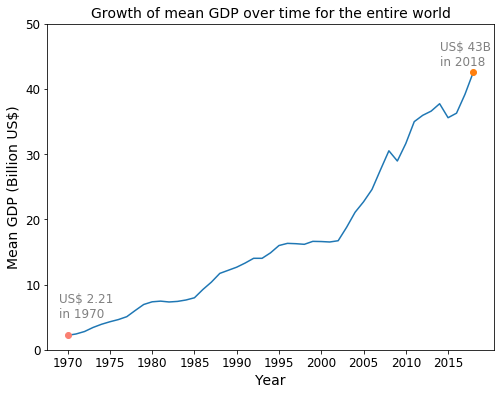

In [10]:
# Mean GDP over time for the entire world
mean_GDP_over_time = gdp_summary_df.groupby('Year')['mean'].first()
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Growth of mean GDP over time for the entire world', fontsize = 14);
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Mean GDP (Billion US$)', fontsize = 14);
ax1.set_ylim([0,50]);
ax1.plot(mean_GDP_over_time.drop(['Latitude','Longitude']));
ax1.plot([48],[mean_GDP_over_time['2018']],'o')
ax1.plot([0],[mean_GDP_over_time['1970']],'o', color='salmon')
xticks_values = [_ for _ in range(0,50,5)];
ax1.set_xticks(xticks_values);
ax1.annotate(f'US$ {round(mean_GDP_over_time["1970"], 2)} \nin 1970', \
             xy=(-1, mean_GDP_over_time['1970']*2.25), fontsize = 12, color='gray')
ax1.annotate('US$ 43B \nin 2018', xy=(44, mean_GDP_over_time['2018']+1), fontsize = 12, color='gray')
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend('Test', loc='right')
plt.show()

In [55]:
# Pick only those country codes which correspond to the geojson string file
common_country_names = []
for feature in countries_geojson['features']:
    gmap_country_name = feature['properties']['name']
    if gmap_country_name in list(gdp_data['Country Name']):
        common_country_names.append(gmap_country_name)
len(common_country_names)

gdp_list = []
year = '2004'
for country in common_country_names:
    if country in list(gdp_data['Country Name']):
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        temp_tuple = (country,round(gdp_val,2))
        gdp_list.append(temp_tuple)
country2gdp = dict(gdp_list)

# We will need to scale the GDP values to lie between 0 and 1
min_gdp = min(country2gdp.values())
max_gdp = max(country2gdp.values())
gdp_range = max_gdp - min_gdp

def calculate_color(gdp_value):
    """
    Convert the GDP coefficient to a color
    """
    # make gini a number between 0 and 1
    normalized_gdp = (gdp_value - min_gdp) / gdp_range

    # invert gini so that high inequality gives dark color
#     inverse_gdp = 1.0 - normalized_gdp
    inverse_gdp = normalized_gdp

    # transform the gini coefficient to a matplotlib color
    mpl_color = viridis(inverse_gdp)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

#  build an array of colors, one for each country
colors = []
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    try:
        gdp = country2gdp[country_name]
        color = calculate_color(gdp)
    except KeyError:
        # no gdp for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

In [56]:
# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '0px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(zoom_level = 2, center = (40,10), layout=figure_layout, display_toolbar = False)
geojson = gmaps.geojson_layer(countries_geojson, fill_opacity=0.05, stroke_weight=2)
fig.add_layer(geojson)
fig

gdp_layer = gmaps.geojson_layer(countries_geojson,fill_color=colors, fill_opacity = 0.8, stroke_weight=2)
fig.add_layer(geojson)
fig

fig.add_layer(gdp_layer)
fig

coordinates = gdp_data[['Latitude','Longitude']]

info_box_list = []
for country in list(gdp_data['Country Name']):
    try:
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        info_box_list.append(f'{country}; US$ {round(gdp_val,2)}B')
    except:
        continue
    
symbol_layer = gmaps.symbol_layer(coordinates, \
                                  scale = 2, \
                                  fill_color='red', \
                                  stroke_color='red', \
                                 info_box_content=info_box_list)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='0px', wi…